In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer(as_frame=True)

In [2]:
data.data.shape

(569, 30)

In [3]:
df = data.frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# D1

In [4]:
df = df.sort_index(axis=1)

In [5]:
df.columns

Index(['area error', 'compactness error', 'concave points error',
       'concavity error', 'fractal dimension error', 'mean area',
       'mean compactness', 'mean concave points', 'mean concavity',
       'mean fractal dimension', 'mean perimeter', 'mean radius',
       'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error',
       'radius error', 'smoothness error', 'symmetry error', 'target',
       'texture error', 'worst area', 'worst compactness',
       'worst concave points', 'worst concavity', 'worst fractal dimension',
       'worst perimeter', 'worst radius', 'worst smoothness', 'worst symmetry',
       'worst texture'],
      dtype='object')

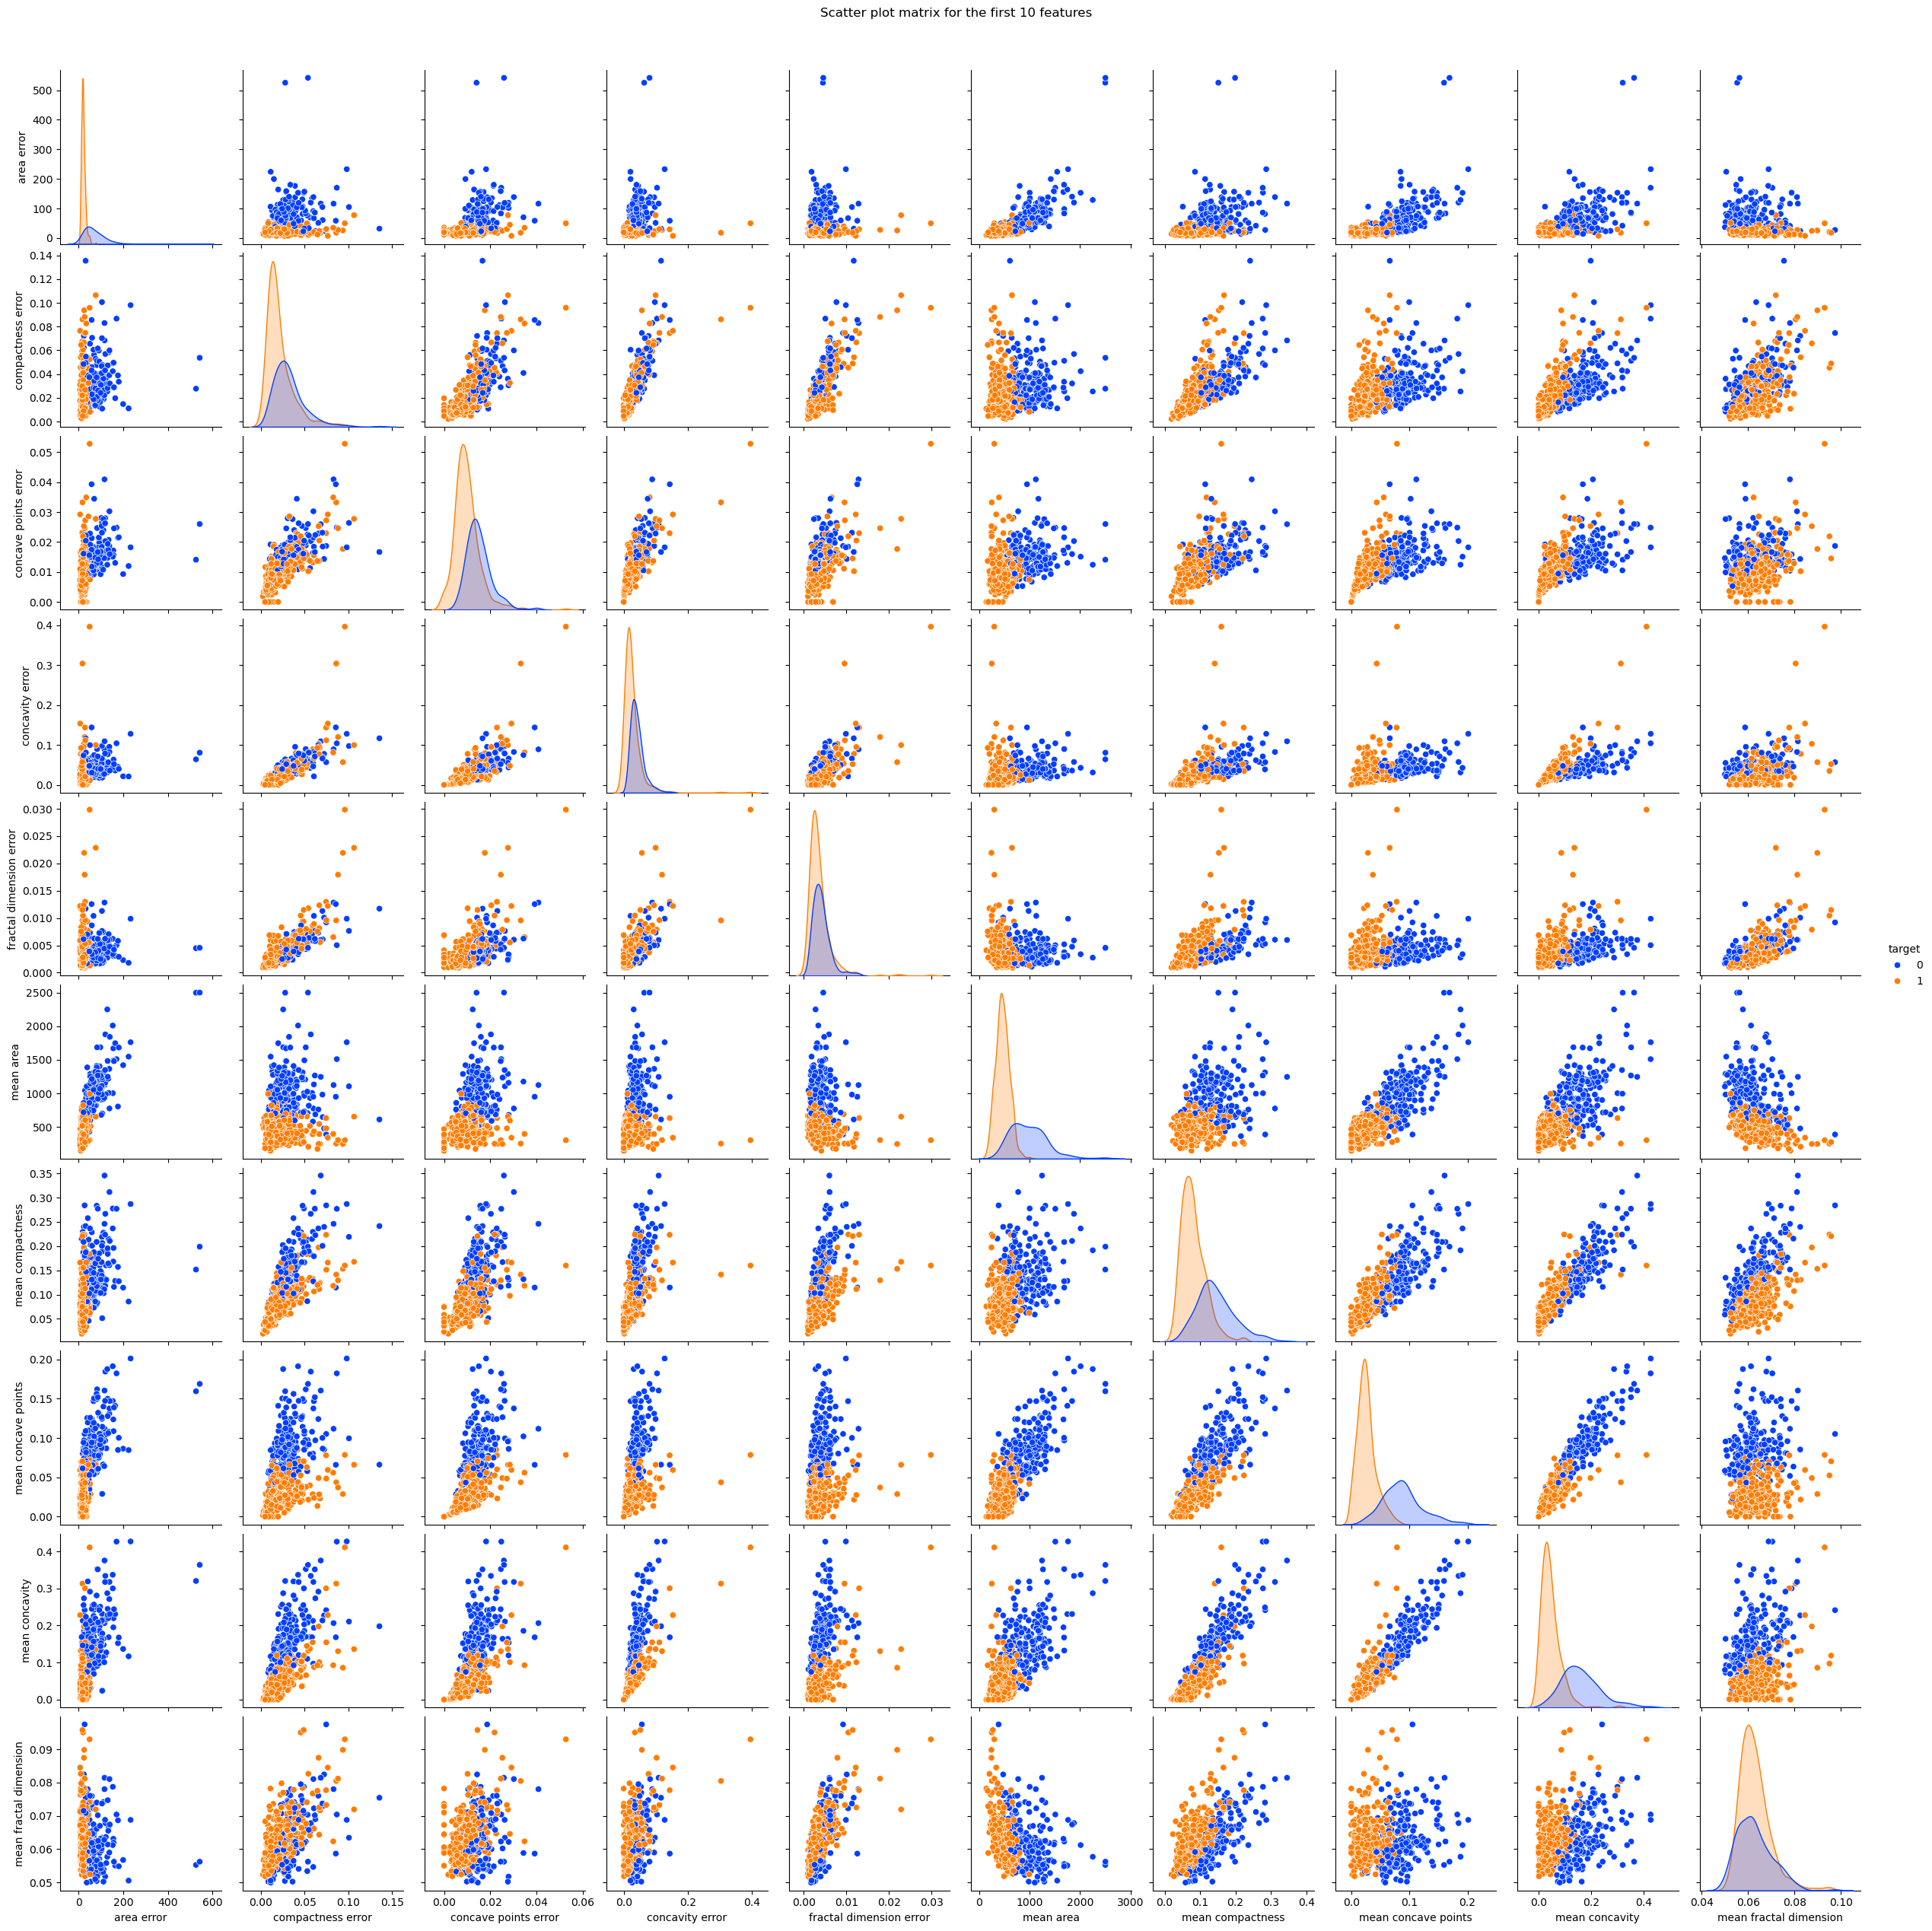

In [6]:
# Select first 10 features and the target
features = df.columns[:10].tolist()
features.append('target')

# Create a pairplot
sns.pairplot(df[features], hue='target', palette='bright')
plt.suptitle('Scatter plot matrix for the first 10 features', y=1.02)
plt.show()


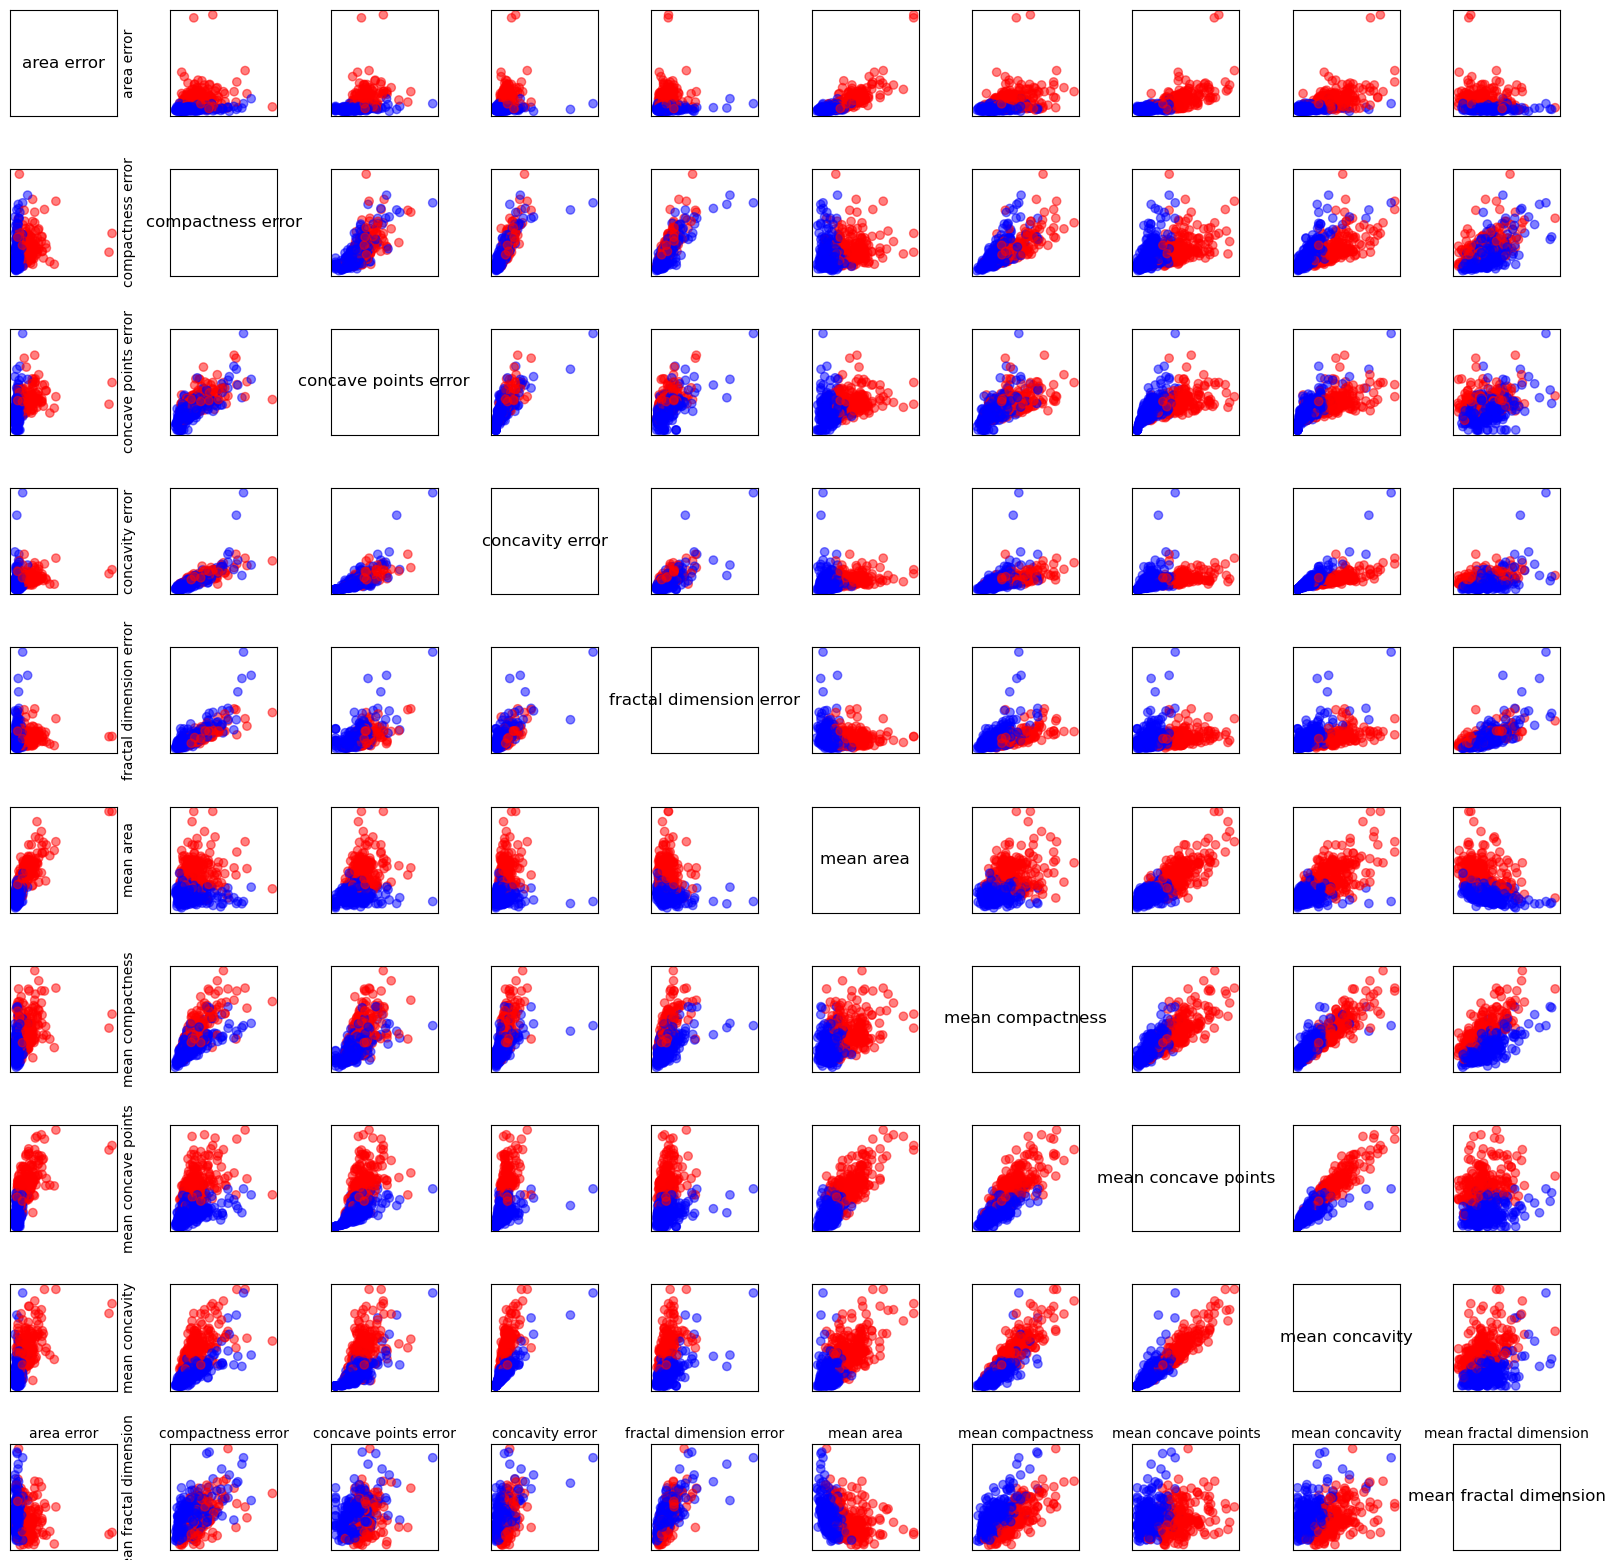

In [7]:
# Select the first 10 features
features = df.columns[:10]

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Define colors
colors = ['red' if x == 0 else 'blue' for x in df['target']]

for i, feature_i in enumerate(features):
    for j, feature_j in enumerate(features):
        ax = axes[i, j]
        if i != j:
            ax.scatter(df[feature_j], df[feature_i], c=colors, alpha=0.5)
        else:
            ax.text(0.5, 0.5, feature_i, fontsize=12, ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 9:
            ax.set_xlabel(feature_j)
            ax.xaxis.set_label_position('top') 
        if j == 0:
            ax.set_ylabel(feature_i)
            ax.yaxis.set_label_position('right')

plt.show()


# D2

In [8]:
correlation_matrix = df.corr()
correlation_matrix

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
area error,1.000000,0.284840,0.415730,0.270895,0.127071,0.800086,0.455653,0.690299,0.617427,-0.090170,...,0.811408,0.283257,0.538166,0.385100,0.017539,0.761213,0.757373,0.125389,0.074126,0.196497
compactness error,0.284840,1.000000,0.744083,0.801268,0.803269,0.212583,0.738722,0.490424,0.670279,0.559837,...,0.199371,0.678780,0.483208,0.639147,0.590973,0.260516,0.204607,0.227394,0.277878,0.143003
concave points error,0.415730,0.744083,1.000000,0.771804,0.611044,0.372320,0.642262,0.615634,0.683260,0.341198,...,0.342271,0.452888,0.602450,0.549592,0.310655,0.394999,0.358127,0.215351,0.143116,0.086741
concavity error,0.270895,0.801268,0.771804,1.000000,0.727372,0.207660,0.570517,0.439167,0.691270,0.446630,...,0.188353,0.484858,0.440472,0.662564,0.439329,0.226680,0.186904,0.168481,0.197788,0.100241
fractal dimension error,0.127071,0.803269,0.611044,0.727372,1.000000,-0.019887,0.507318,0.257584,0.449301,0.688132,...,-0.022736,0.390159,0.215204,0.379975,0.591328,-0.001000,-0.037488,0.170568,0.111094,-0.003195
mean area,0.800086,0.212583,0.372320,0.207660,-0.019887,1.000000,0.498502,0.823269,0.685983,-0.283110,...,0.959213,0.390410,0.722017,0.512606,0.003738,0.959120,0.962746,0.123523,0.143570,0.287489
mean compactness,0.455653,0.738722,0.642262,0.570517,0.507318,0.498502,1.000000,0.831135,0.883121,0.565369,...,0.509604,0.865809,0.815573,0.816275,0.687382,0.590210,0.535315,0.565541,0.510223,0.248133
mean concave points,0.690299,0.490424,0.615634,0.439167,0.257584,0.823269,0.831135,1.000000,0.921391,0.166917,...,0.809630,0.667454,0.910155,0.752399,0.368661,0.855923,0.830318,0.452753,0.375744,0.292752
mean concavity,0.617427,0.670279,0.683260,0.691270,0.449301,0.685983,0.883121,0.921391,1.000000,0.336783,...,0.675987,0.754968,0.861323,0.884103,0.514930,0.729565,0.688236,0.448822,0.409464,0.299879
mean fractal dimension,-0.090170,0.559837,0.341198,0.446630,0.688132,-0.283110,0.565369,0.166917,0.336783,1.000000,...,-0.231854,0.458798,0.175325,0.346234,0.767297,-0.205151,-0.253691,0.504942,0.334019,-0.051269


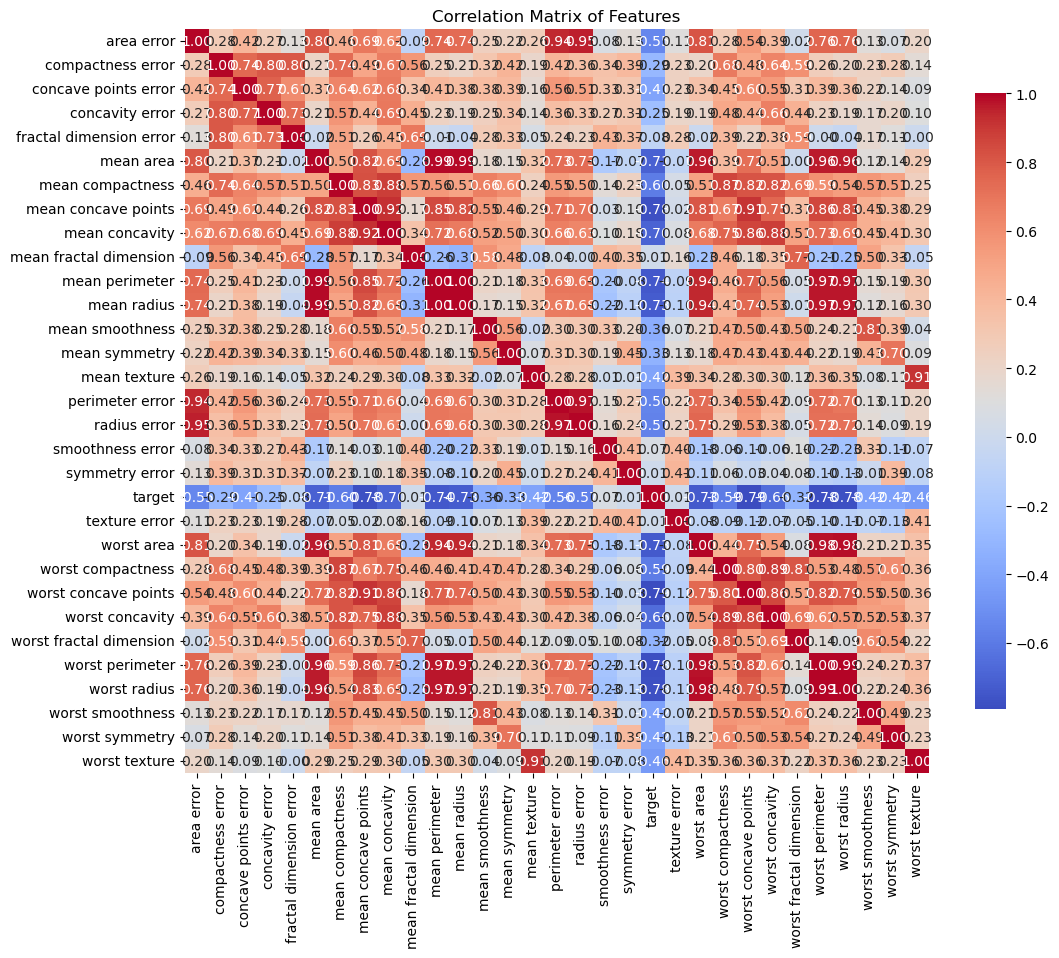

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cbar_kws={'shrink': .8}, square=True)

# Add title
plt.title('Correlation Matrix of Features')

# Show plot
plt.show()


# D5

In [12]:
# Print current column names
print(df.columns.tolist())


['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error', 'smoothness error', 'symmetry error', 'target', 'texture error', 'worst area', 'worst compactness', 'worst concave points', 'worst concavity', 'worst fractal dimension', 'worst smoothness', 'worst symmetry', 'worst texture']


In [13]:
# List of features to be dropped
features_to_drop = ['mean perimeter', 'mean radius', 'worst radius', 'worst perimeter', 'radius error']

# Drop the specified features safely
df = df.drop(columns=[col for col in features_to_drop if col in df.columns])

# Verify remaining columns
print(df.columns)


Index(['area error', 'compactness error', 'concave points error',
       'concavity error', 'fractal dimension error', 'mean area',
       'mean compactness', 'mean concave points', 'mean concavity',
       'mean fractal dimension', 'mean smoothness', 'mean symmetry',
       'mean texture', 'perimeter error', 'smoothness error', 'symmetry error',
       'target', 'texture error', 'worst area', 'worst compactness',
       'worst concave points', 'worst concavity', 'worst fractal dimension',
       'worst smoothness', 'worst symmetry', 'worst texture'],
      dtype='object')


In [14]:
# Print the shape of the DataFrame
print("Updated DataFrame shape:", df.shape)


Updated DataFrame shape: (569, 26)


# D6

In [16]:
X = df.drop(columns='target')
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split

# Split the data - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=5508)

# Fit the model on the training data
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5508)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on both the training set and the test set
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Calculate accuracy, precision, and recall for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# Calculate accuracy, precision, and recall for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Compute the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print("Confusion Matrix on Test Set:\n", test_conf_matrix)


Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Test Accuracy: 0.96
Test Precision: 0.97
Test Recall: 0.97
Confusion Matrix on Test Set:
 [[39  2]
 [ 2 71]]


# D8

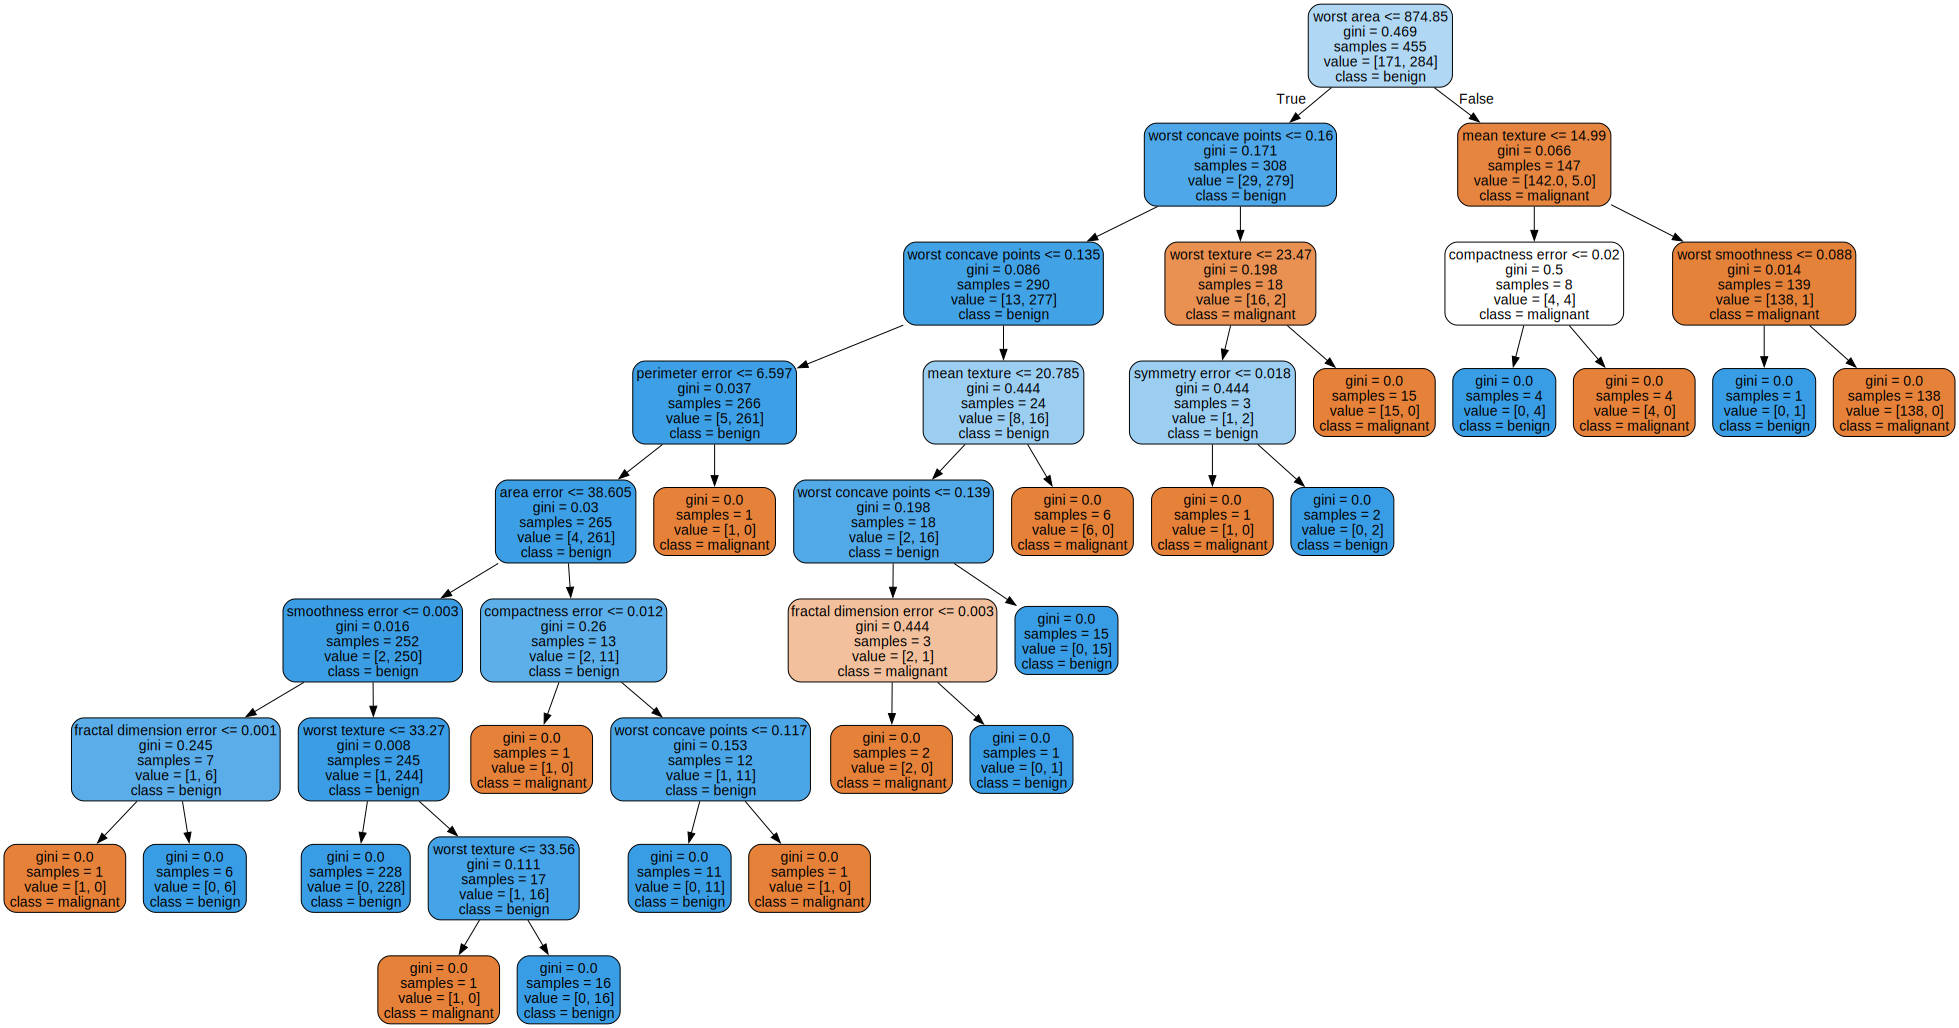

In [20]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format object
dot_data = export_graphviz(
    tree_clf,
    out_file=None,  # or specify a path to save the .dot file
    feature_names=X.columns,
    class_names=['malignant', 'benign'],
    rounded=True,
    filled=True
)

# Display the decision tree
graph = graphviz.Source(dot_data)
graph.render("Breast_Cancer_Tree")  # Saves the tree to a file
graph  # Displays the tree here in Jupyter


# D10

In [21]:
# Random states for different splits
random_states = [5508, 5509, 5510, 5511, 5512]

# Lists to store scores
accuracies = []
precisions = []
recalls = []

In [22]:
# Iterate over each random state
for seed in random_states:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Initialize and fit the Decision Tree
    tree_clf = DecisionTreeClassifier(random_state=5508)
    tree_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_test_pred = tree_clf.predict(X_test)
    
    # Calculate and store the metrics
    accuracies.append(accuracy_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))


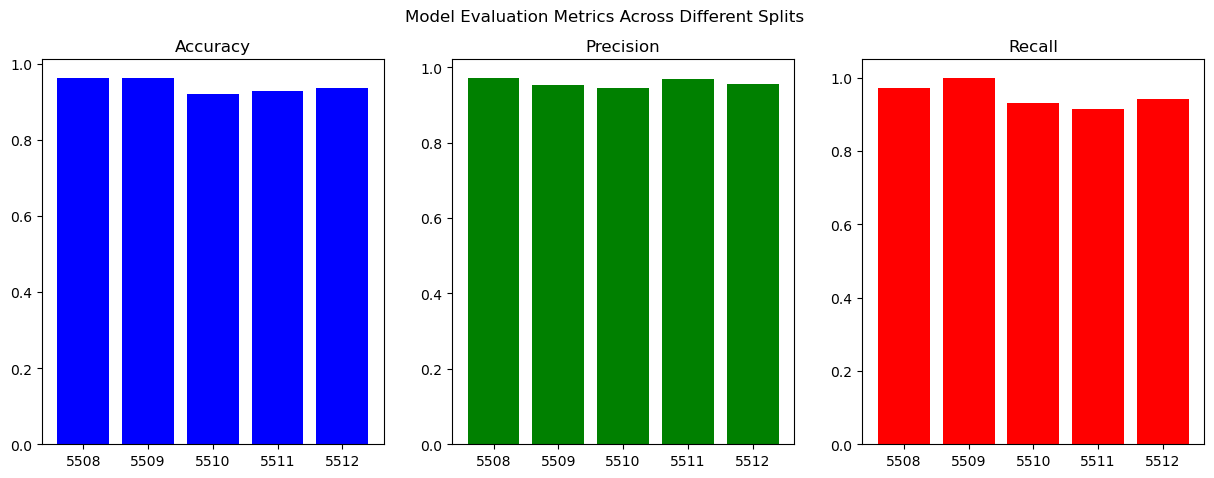

In [23]:
# Setting up the plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Model Evaluation Metrics Across Different Splits')

# Accuracy plot
axs[0].bar(range(len(random_states)), accuracies, color='blue')
axs[0].set_title('Accuracy')
axs[0].set_xticks(range(len(random_states)))
axs[0].set_xticklabels(random_states)

# Precision plot
axs[1].bar(range(len(random_states)), precisions, color='green')
axs[1].set_title('Precision')
axs[1].set_xticks(range(len(random_states)))
axs[1].set_xticklabels(random_states)

# Recall plot
axs[2].bar(range(len(random_states)), recalls, color='red')
axs[2].set_title('Recall')
axs[2].set_xticks(range(len(random_states)))
axs[2].set_xticklabels(random_states)

plt.show()


# D11

In [24]:
# Training and testing splits
splits = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Lists to store scores
accuracies = []
precisions = []
recalls = []

In [25]:
# Iterate over each split configuration
for train_size, test_size in splits:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=5508)
    
    # Initialize and fit the Decision Tree
    tree_clf = DecisionTreeClassifier(random_state=5508)
    tree_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_test_pred = tree_clf.predict(X_test)
    
    # Calculate and store the metrics
    accuracies.append(accuracy_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))


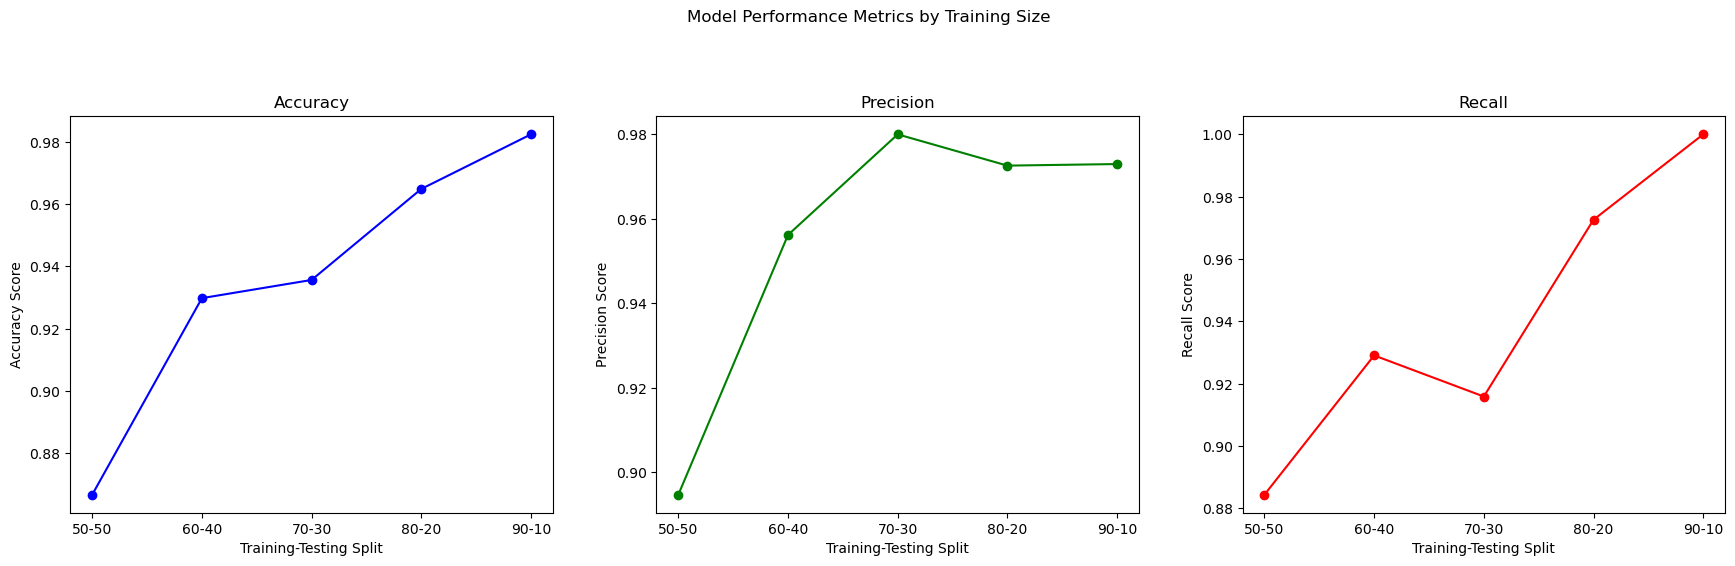

In [26]:
# Setting up the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Performance Metrics by Training Size')

training_sizes = ['50-50', '60-40', '70-30', '80-20', '90-10']

# Accuracy plot
axs[0].plot(training_sizes, accuracies, marker='o', linestyle='-', color='blue')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Training-Testing Split')
axs[0].set_ylabel('Accuracy Score')

# Precision plot
axs[1].plot(training_sizes, precisions, marker='o', linestyle='-', color='green')
axs[1].set_title('Precision')
axs[1].set_xlabel('Training-Testing Split')
axs[1].set_ylabel('Precision Score')

# Recall plot
axs[2].plot(training_sizes, recalls, marker='o', linestyle='-', color='red')
axs[2].set_title('Recall')
axs[2].set_xlabel('Training-Testing Split')
axs[2].set_ylabel('Recall Score')

plt.tight_layout(pad=3.0)
plt.show()
